In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [2]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1

# 在axis=1的轴上把数据加上去，这个数据在axis这个轴的1位置
# male -> 0, 5001-2
# female -> 1, 5001-2+1
y = np.expand_dims(gender, axis=1)
#print(y)

# 两矩阵左右相加，要求行数相等
# 第0列是height, 第1列是weight
X = np.c_[height.reshape(-1), weight.reshape(-1)]
#print(X)

# 打乱y和X的顺序
y, X = sample_data(y, X, seed, size_samples=200)
# print(X)

#将数据正则化
#返回x正则化之后的值，x之前的均值和x的标准差
x, mean_x, std_x = standardize(X)

#print("y's shape is ", np.shape(y))
tx = np.c_[np.ones((y.shape[0], 1)), x]
print("tx's shape ", np.shape(tx))

tx's shape  (200, 3)


Use `least_squares` to compute w, and visualize the results.

tx's shape is  (200, 3)
w's shape is  (3, 1)


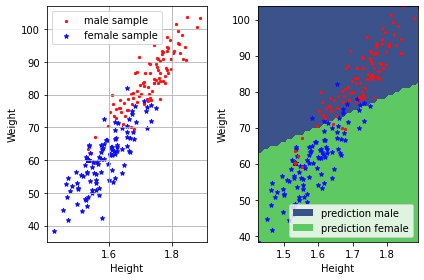

In [3]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    print("tx's shape is ", np.shape(tx))
    # w = least squares with respect to tx and y
    w = least_squares(y, tx)
    print("w's shape is ", np.shape(w))
    #raise NotImplementedError

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [4]:
np.exp(1)

2.718281828459045

In [5]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    # raise NotImplementedError
    
    return 1/(1+np.exp(-t))
    

In [6]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    # raise NotImplementedError
    
    # L(w) = -sum_{i=1}^n{ y_i*log(sigmoid(x_i^T*w)) + (1-y_i)*log(1-sigmoid(x_i^T*w))}
    
    # tx: (200, 3)
    # w: (3, 1)
    tx_w = sigmoid(np.dot(tx, w))
    first_part = np.dot(y.T, np.log(tx_w))
    second_part = np.dot((1-y.T), np.log(1-tx_w))
    
    return -(first_part+second_part)
    

In [7]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO
    # ***************************************************
    # raise NotImplementedError
    # grad_L(w) = sum_{i=1}^n(sigmoid(x_i^T*w)-y_i)*x_i
    
    return np.dot(tx.T, (sigmoid(np.dot(tx, w)) - y))

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [8]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the loss: TODO
    # ***************************************************
    # raise NotImplementedError
    
    loss = calculate_loss(y, tx, w)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # compute the gradient: TODO
    # ***************************************************
    # raise NotImplementedError
    
    gradient = calculate_gradient(y, tx, w)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    # raise NotImplementedError
    
    w = w - gamma*gradient
    
    return loss, w

Demo!

tx's dimensionality is  (200, 3)
w's shape is  (3, 1)
y's shape is  (200, 1)
Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.46403231]]
Current iteration=200, loss=[[41.54589281]]
Current iteration=300, loss=[[41.09863897]]
Current iteration=400, loss=[[40.96487064]]
Current iteration=500, loss=[[40.92008946]]
Current iteration=600, loss=[[40.90418744]]
Current iteration=700, loss=[[40.89834995]]
Current iteration=800, loss=[[40.89616497]]
Current iteration=900, loss=[[40.89533753]]
Current iteration=1000, loss=[[40.89502196]]
Current iteration=1100, loss=[[40.89490109]]
Current iteration=1200, loss=[[40.89485466]]
Current iteration=1300, loss=[[40.8948368]]
Current iteration=1400, loss=[[40.89482992]]
Current iteration=1500, loss=[[40.89482727]]
loss=[[40.89482664]]


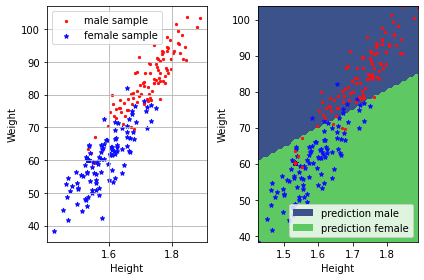

In [9]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    print("tx's dimensionality is ", np.shape(tx))
    
    w = np.zeros((tx.shape[1], 1))
    print("w's shape is ", np.shape(w))
    
    print("y's shape is ", np.shape(y))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [23]:
# For the test
tx = np.c_[np.ones((y.shape[0], 1)), x]
w = np.zeros((tx.shape[1], 1))

xw = sigmoid(np.dot(tx, w))
S = (xw*(1-xw))
print("S's shape ", np.shape(S))
#print(S)
print("S's shape ", np.shape(S.T[0]))
S = np.diag(S.T[0])
#print(np.shape(S))
XTS = np.dot(tx.T, S)
XTSX = np.dot(XTS, tx)

S's shape  (200, 1)
S's shape  (200,)


In [28]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # calculate Hessian: TODO
    # ***************************************************
    # raise NotImplementedError
    
    # y -> (200,1)
    # tx -> (200, 3)
    # w -> (3,1)
    
    """
    # second_derivatives
    # sum_{i=1}^n{sigmoid(x_i^T*w)*(1-sigmoid(x_i^T*w))*x_i*x_i^T}
    xw = sigmoid(np.dot(tx, w))
    # xw -> (200,1)
    S = np.diag(xw*(1-xw)) # a number
    XTS = tx.T*S
    XTSX = np.dot(XTS, tx)
    
    """
    xw = sigmoid(np.dot(tx, w))
    S = (xw*(1-xw))
    S = np.diag(S.T[0])
    #print(np.shape(S))
    XTS = np.dot(tx.T, S)
    XTSX = np.dot(XTS, tx)
    
    return XTSX
    

Write a function below to return loss, gradient, and Hessian.

In [29]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    # raise NotImplementedError
    
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    Hessian = calculate_hessian(y, tx, w)
    
    return loss, gradient, Hessian
    

### Using Newton's method
Use Newton's method for logistic regression.

In [30]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient and Hessian: TODO
    # ***************************************************
    # raise NotImplementedError
    loss, gradient, Hessian = logistic_regression(y, tx, w)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    # raise NotImplementedError
    
    w = w - gamma * np.dot(np.linalg.inv(Hessian), gradient)
    
    return loss, w

demo

Current iteration=0, the loss=[[138.62943611]]
Current iteration=1, the loss=[[63.41155374]]
Current iteration=2, the loss=[[47.3045862]]
Current iteration=3, the loss=[[41.99746742]]
Current iteration=4, the loss=[[40.95639864]]
Current iteration=5, the loss=[[40.89511994]]
Current iteration=6, the loss=[[40.89482562]]
Current iteration=7, the loss=[[40.89482561]]
loss=[[40.89482561]]


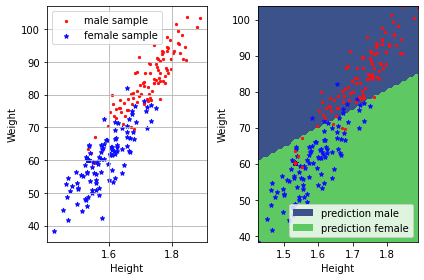

In [31]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [32]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient, and Hessian: TODO
    # ***************************************************
    # raise NotImplementedError
    
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    
    return loss, gradient

In [33]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # return loss, gradient: TODO
    # ***************************************************
    # raise NotImplementedError
    
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    
    # ***************************************************
    # INSERT YOUR CODE HERE
    # update w: TODO
    # ***************************************************
    # raise NotImplementedError
    
    w = w - gamma * gradient
    
    return loss, w

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[43.46403231]]
Current iteration=200, loss=[[41.54589281]]
Current iteration=300, loss=[[41.09863897]]
Current iteration=400, loss=[[40.96487064]]
Current iteration=500, loss=[[40.92008946]]
Current iteration=600, loss=[[40.90418744]]
Current iteration=700, loss=[[40.89834995]]
Current iteration=800, loss=[[40.89616497]]
Current iteration=900, loss=[[40.89533753]]
Current iteration=1000, loss=[[40.89502196]]
Current iteration=1100, loss=[[40.89490109]]
Current iteration=1200, loss=[[40.89485466]]
Current iteration=1300, loss=[[40.8948368]]
Current iteration=1400, loss=[[40.89482992]]
Current iteration=1500, loss=[[40.89482727]]
loss=[[40.89482664]]


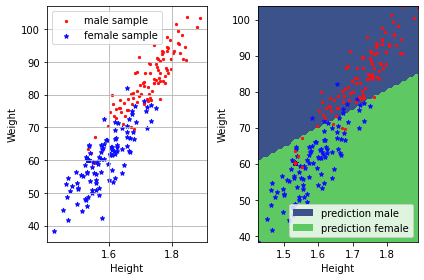

In [34]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)